#### This model comprises of the Learing curves on the dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Updated_planet.csv')
df.head()

,default_flag,sy_snum,sy_pnum,discoverymethod,pl_orbper,pl_orbsmax,pl_msinie,pl_orbeccen,st_teff,st_rad,st_mass,st_logg,sy_dist
0,1,2,1,8,326.030000,1.29,6165.6000,0.231000,4742.000000,19.000000,2.70,2.310000,93.1846
1,0,2,1,8,389.426657,1.21,5434.7000,0.180667,4565.666667,22.596667,2.60,2.183333,93.1846
2,0,1,1,8,452.823313,1.51,3432.4000,0.130333,4389.333333,26.193333,1.70,2.056667,125.3210
3,1,1,1,8,516.219970,1.53,4684.8142,0.080000,4213.000000,29.790000,2.78,1.930000,125.3210
4,0,1,1,8,516.220000,1.54,3337.0700,0.080000,4340.000000,24.080000,1.80,1.600000,125.3210


In [3]:
# splitting the data into the variables
Y = df['sy_pnum']
X = df.drop('sy_pnum',axis = 1)

In [6]:
# importing the required Library
from sklearn.model_selection import learning_curve

#### Plotting the Learning curves of Ensemble Models
###### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
train_sizes,train_scores,test_scores=learning_curve(DecisionTreeClassifier(),X,Y,cv = 10,scoring = 'accuracy',n_jobs = -1,train_sizes = np.linspace(0.01,1,50),verbose=1)

[learning_curve] Training set sizes: [  241   729  1217  1704  2192  2680  3168  3655  4143  4631  5119  5607
  6094  6582  7070  7558  8046  8533  9021  9509  9997 10484 10972 11460
 11948 12436 12923 13411 13899 14387 14875 15362 15850 16338 16826 17313
 17801 18289 18777 19265 19752 20240 20728 21216 21704 22191 22679 23167
 23655 24143]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   32.0s finished


In [17]:
train_mean = np.mean(train_scores2,axis = 1)
train_mean

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
train_std = np.std(train_scores,axis = 1)
train_std

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
test_mean = np.mean(test_scores,axis = 1)
test_mean

array([0.38236956, 0.41884942, 0.39819406, 0.44974976, 0.37433484,
       0.44900692, 0.34069551, 0.45780559, 0.42616117, 0.44427126,
       0.40990638, 0.42399887, 0.41214323, 0.40218934, 0.39272711,
       0.39988478, 0.39682904, 0.3845245 , 0.38184191, 0.36361611,
       0.34464384, 0.37084536, 0.35661006, 0.32656449, 0.33648274,
       0.29748783, 0.30889752, 0.2961432 , 0.32981149, 0.31165815,
       0.28648764, 0.27283823, 0.24185589, 0.2311927 , 0.23022474,
       0.2346256 , 0.23798193, 0.24495181, 0.24189503, 0.26773211,
       0.26090979, 0.2672145 , 0.26415537, 0.27008188, 0.26765698,
       0.26866553, 0.3013571 , 0.30228906, 0.30482421, 0.32860601])

In [20]:
test_std = np.std(test_scores,axis = 1)
test_std

array([0.12481821, 0.07548077, 0.05746949, 0.02994433, 0.06814623,
       0.04864123, 0.12585634, 0.06810904, 0.05312721, 0.04639143,
       0.07819026, 0.10908937, 0.09826356, 0.08957644, 0.09481738,
       0.11600128, 0.10644926, 0.12818282, 0.10901233, 0.12748118,
       0.13200178, 0.11292424, 0.128226  , 0.12311563, 0.13690239,
       0.12806424, 0.13203975, 0.11215944, 0.14400494, 0.14304367,
       0.10574681, 0.09066708, 0.11748608, 0.11635093, 0.11407788,
       0.10044768, 0.09611904, 0.09891408, 0.09447697, 0.09656016,
       0.09831422, 0.10873213, 0.09573425, 0.10273507, 0.10655404,
       0.10100547, 0.08924108, 0.09593708, 0.09255118, 0.07162883])

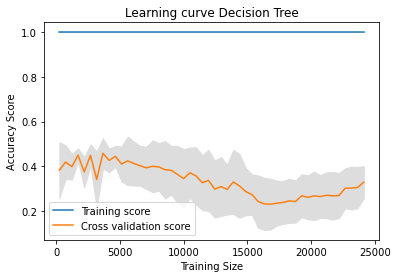

In [21]:
### high variance required to reduce the complexity of the data and feed more traing data
import matplotlib.pyplot as plt
plt.plot(train_sizes,train_mean,label = 'Training score')
plt.plot(train_sizes,test_mean,label = 'Cross validation score')
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color = '#DDDDDD')
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color = '#DDDDDD')

plt.title('Learning curve Decision Tree')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

#### Plotting the learning curve for Ada Boost classifier

In [23]:
from sklearn.ensemble import AdaBoostClassifier
train_sizes_ADA,train_scores_ADA,test_scores_ADA=learning_curve(AdaBoostClassifier(),X,Y,cv = 10,scoring = 'accuracy',n_jobs = -1,train_sizes = np.linspace(0.01,1,50),verbose=1)

[learning_curve] Training set sizes: [  241   729  1217  1704  2192  2680  3168  3655  4143  4631  5119  5607
  6094  6582  7070  7558  8046  8533  9021  9509  9997 10484 10972 11460
 11948 12436 12923 13411 13899 14387 14875 15362 15850 16338 16826 17313
 17801 18289 18777 19265 19752 20240 20728 21216 21704 22191 22679 23167
 23655 24143]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.8min finished


In [24]:
train_mean_ADA = np.mean(train_scores_ADA,axis = 1)
train_mean_ADA

array([0.90290456, 0.68683128, 0.6221857 , 0.60234742, 0.65862226,
       0.43716418, 0.346875  , 0.43978112, 0.37038378, 0.5273807 ,
       0.51541317, 0.6074728 , 0.61519527, 0.62122455, 0.57963225,
       0.61078328, 0.61425553, 0.5993906 , 0.62560692, 0.61033757,
       0.60712214, 0.55923312, 0.49324645, 0.49157941, 0.48517744,
       0.47848183, 0.44826279, 0.48926255, 0.39171883, 0.36008897,
       0.31323025, 0.32127978, 0.38721767, 0.40952993, 0.40039225,
       0.42640213, 0.42339756, 0.39729346, 0.34540661, 0.33917467,
       0.34155529, 0.34636364, 0.43598997, 0.43602941, 0.44214431,
       0.46322383, 0.45526699, 0.48520741, 0.50683576, 0.51319637])

In [25]:
train_std_ADA = np.std(train_scores_ADA,axis = 1)
train_std_ADA

array([3.23651452e-02, 4.81481481e-02, 2.16926869e-02, 2.88732394e-02,
       1.50202131e-02, 2.15199866e-02, 1.12364733e-01, 7.41178642e-02,
       1.27854886e-01, 5.85327843e-02, 7.97508944e-02, 3.79189574e-02,
       3.39830543e-02, 1.36170627e-02, 9.13984618e-02, 9.76204951e-02,
       4.45640940e-02, 4.92965435e-02, 4.23619203e-02, 5.70784595e-02,
       3.08251915e-02, 8.41331158e-02, 1.65832575e-01, 1.27652939e-01,
       1.76259965e-01, 1.55680527e-01, 1.61697877e-01, 1.32514029e-01,
       1.32199950e-01, 1.11774442e-01, 1.15970354e-01, 9.17797495e-02,
       1.02770449e-01, 1.06873565e-01, 9.52095532e-02, 1.04671077e-01,
       1.04439347e-01, 1.02295727e-01, 8.55268970e-02, 8.31583470e-02,
       8.00071512e-02, 7.56157196e-02, 6.76167800e-02, 6.48405719e-02,
       6.35710032e-02, 5.01202889e-02, 6.21818315e-02, 2.44088242e-02,
       3.46942461e-03, 5.38458352e-05])

In [26]:
test_mean_ADA = np.mean(test_scores_ADA,axis = 1)
test_mean_ADA

array([0.51237593, 0.5005235 , 0.4983605 , 0.50074599, 0.5090217 ,
       0.26160898, 0.20103134, 0.3946553 , 0.3782892 , 0.43856883,
       0.46793894, 0.49265934, 0.49265934, 0.49191414, 0.46153748,
       0.45080273, 0.49120509, 0.48926737, 0.4998523 , 0.46746319,
       0.44524793, 0.4916883 , 0.44099888, 0.40685888, 0.34379565,
       0.38460851, 0.37849581, 0.45072841, 0.29784045, 0.35832912,
       0.3468873 , 0.28383838, 0.21393028, 0.19931859, 0.26053298,
       0.26314288, 0.26314288, 0.26661044, 0.2747327 , 0.28177968,
       0.35384259, 0.40830862, 0.39461225, 0.40374457, 0.44307837,
       0.44546376, 0.45572292, 0.45810845, 0.51300974, 0.51304703])

In [27]:
test_std_ADA = np.std(test_scores_ADA,axis = 1)
test_std_ADA

array([0.0014861 , 0.03456088, 0.01149631, 0.01822468, 0.01033323,
       0.06009865, 0.09881254, 0.06370315, 0.09357773, 0.06578063,
       0.03971753, 0.05595723, 0.05595723, 0.05609763, 0.09432137,
       0.12367647, 0.05570782, 0.05570941, 0.02170802, 0.07030468,
       0.12799233, 0.03108813, 0.1327942 , 0.14720095, 0.19870712,
       0.14409792, 0.16568514, 0.12070404, 0.15331049, 0.13084773,
       0.13978488, 0.16009438, 0.14254816, 0.12585712, 0.09020613,
       0.09349292, 0.09349292, 0.09302176, 0.10909475, 0.1098201 ,
       0.15256657, 0.15428243, 0.11168959, 0.11340772, 0.10382427,
       0.100615  , 0.08521082, 0.0834165 , 0.00070098, 0.00062903])

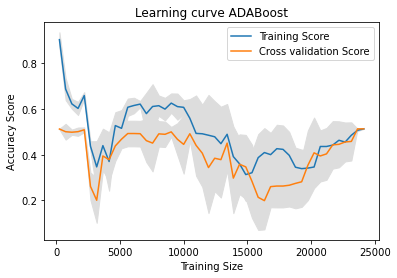

In [28]:
plt.plot(train_sizes_ADA,train_mean_ADA,label = 'Training Score')
plt.plot(train_sizes_ADA,test_mean_ADA,label = 'Cross validation Score')
plt.fill_between(train_sizes_ADA,train_mean_ADA-train_std_ADA,train_mean_ADA+train_std_ADA,color = '#DDDDDD')
plt.fill_between(train_sizes_ADA,test_mean_ADA-test_std_ADA,test_mean_ADA+test_std_ADA,color = '#DDDDDD')
plt.title('Learning curve ADABoost')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()